In [1]:
import pandas as pd

df = pd.read_csv("sanatcilar_biyografi_lemmatized.csv")
print(df.head(10))  # İlk 10 satıra bakalım


  Lemmatized Words
0            frida
1            kahlo
2        magdalena
3           carmen
4            frida
5            kahlo
6         calderon
7           temmuz
8           temmuz
9        meksikalı


In [2]:
import os
print(os.getcwd())  # Çalışma dizinini gösterir
print(os.listdir())  # Mevcut dizindeki dosyaları listeler


C:\Windows\System32\-Sanatçı proje
['.ipynb_checkpoints', 'benzerlik.html', 'data', 'lemma.ipynb', 'lemmatizasyon.ipynb', 'lemmatized_model_cbow_window2_dim100.model', 'lemmatized_model_cbow_window2_dim300.model', 'lemmatized_model_cbow_window2_dim300.model.syn1neg.npy', 'lemmatized_model_cbow_window2_dim300.model.wv.vectors.npy', 'lemmatized_model_cbow_window4_dim100.model', 'lemmatized_model_cbow_window4_dim300.model', 'lemmatized_model_cbow_window4_dim300.model.syn1neg.npy', 'lemmatized_model_cbow_window4_dim300.model.wv.vectors.npy', 'lemmatized_model_skipgram_window2_dim100.model', 'lemmatized_model_skipgram_window2_dim300.model', 'lemmatized_model_skipgram_window2_dim300.model.syn1neg.npy', 'lemmatized_model_skipgram_window2_dim300.model.wv.vectors.npy', 'lemmatized_model_skipgram_window4_dim100.model', 'lemmatized_model_skipgram_window4_dim300.model', 'lemmatized_model_skipgram_window4_dim300.model.syn1neg.npy', 'lemmatized_model_skipgram_window4_dim300.model.wv.vectors.npy', 'l

In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

# CSV dosyasını oku
df = pd.read_csv("sanatcilar_biyografi_lemmatized.csv")

# NaN varsa temizle
df = df.dropna()

# TF-IDF modelini oluştur
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df["Lemmatized Words"].astype(str))

# Modeli kaydet
with open("tfidf_lemmatized.pickle", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ TF-IDF modeli oluşturuldu ve tfidf_lemmatized.pickle olarak kaydedildi.")


✅ TF-IDF modeli oluşturuldu ve tfidf_lemmatized.pickle olarak kaydedildi.


In [15]:
# Boş metinleri sil
df = df.dropna(subset=["text"])

# Eğer hala boş string varsa onları da at
df = df[df["text"].str.strip() != ""]

# TF-IDF ve benzerlik analizi
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(df["text"])

hedef = "Pablo Picasso"
target_index = df[df["sanatci_adi"] == hedef].index[0]

similarity_scores = cosine_similarity(X[target_index], X).flatten()
similarity_scores[target_index] = -1

top_5_indices = similarity_scores.argsort()[-5:][::-1]
for idx in top_5_indices:
    print(f"Sanatçı: {df.loc[idx, 'sanatci_adi']}, Benzerlik: {similarity_scores[idx]:.3f}")


Sanatçı: Georges Braque, Benzerlik: 0.263
Sanatçı: Henri Matisse, Benzerlik: 0.159
Sanatçı: Willie Bester, Benzerlik: 0.095
Sanatçı: Paul Gauguin, Benzerlik: 0.093
Sanatçı: Albrecht Dürer, Benzerlik: 0.088


In [8]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/b1/79/0d1c165eac44405a86478082e225fce87874f7198300bbebc55faaf6d28d/matplotlib-3.10.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/01/c8/fadd0b92ffa7b5eb5949bf340a63a4a496a6930a6c37a7ba0f12acb076d6/contourpy-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/6f/25/8dcfeb771de8d9cdffab2b957a05af4395d41ec9a198ec139d2326366a07/fonttools-4.58.1-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/108.2 kB ? eta -:--:--
     ---------------------------------------- 0.0/108.2 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


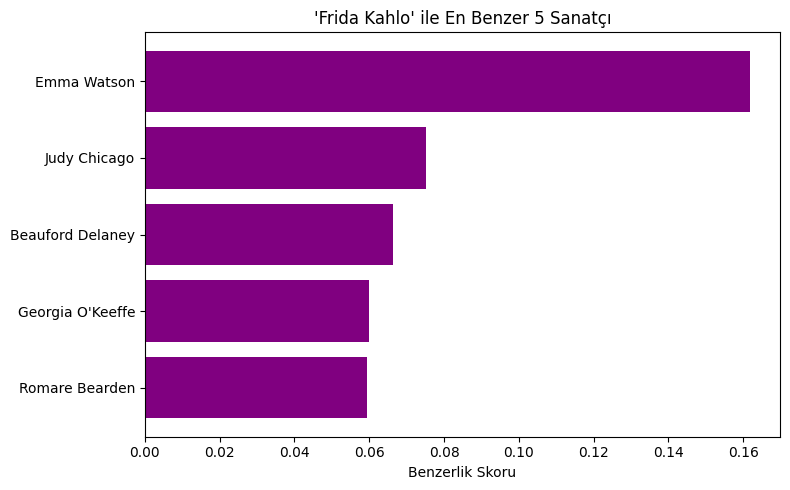

In [11]:
import matplotlib.pyplot as plt

labels = [df.loc[i, "sanatci_adi"] for i in top_5_indices]
scores = [similarity_scores[i] for i in top_5_indices]

plt.figure(figsize=(8, 5))
plt.barh(labels[::-1], scores[::-1], color='purple')
plt.xlabel("Benzerlik Skoru")
plt.title(f"'{hedef}' ile En Benzer 5 Sanatçı")
plt.tight_layout()
plt.show()
